In [55]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [56]:
path = "/Users/guilhermeviveiros/Desktop/Face_Regonition/mlFacesResized/"

In [57]:
def getExtension(filename):
   fileName, fileExtension = os.path.splitext(filename)
   return fileExtension

def inArray(array, to_look):
    for x in array:
	    if(to_look[1:] == x):
		    return True

def isImage(filename):
   # Extensions to search
   extensions = ['jpeg', 'jpg', 'jpe','png'];
   extension = getExtension(filename)
   if (inArray(extensions, extension)):
       return True
   return False

In [58]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

def set_dataset(path,number_images, width, height):
    
    #o 3 vem do RGB
    train_set = np.empty(shape=(number_images,width,height,3));
    test_set = np.empty(shape=(2*5,width,height,3));
    
    tmp_train_set = 0;
    tmp_test_set = 0;
    
    mlfaces = os.listdir(os.path.expanduser(
        path
    ))
    
    for user in mlfaces:
        
        if not user == ".DS_Store":
        
            user_images = os.listdir(os.path.expanduser(
                path + user
            ))
            
            for image in user_images:
                
                tmp = 1
                
                if(isImage(image)):
        
                    image_path = path + user + "/" + image
                
                
                    im = mpimg.imread(image_path)
                    
                    if(tmp < 9):
                        train_set[tmp_train_set] = im;
                    else : test_set[tmp_test_set] = im;
            
            tmp = tmp+1;     
            tmp_train_set = tmp_train_set+1;
            tmp_test_set = tmp_test_set+1;
        
                    
                
    return train_set,test_set;


In [59]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

train_set,test_set = set_dataset(path,45,255,255);

In [60]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))

Train set with a shape of -> (45, 255, 255, 3)
Test set with a shape of -> (10, 255, 255, 3)


In [61]:
#1) calcular a matriz de covariancia

#temos que ter 45 amostras, cada amostra com a sua respeitva coluna, logo vou passar de (2048,1536,3) para (2048*1536*3)
train_set = train_set.reshape(train_set.shape[0], (train_set.shape[1]*train_set.shape[2]*train_set.shape[3]))
test_set = test_set.reshape(test_set.shape[0], (test_set.shape[1]*test_set.shape[2]*test_set.shape[3]))

In [62]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))
#cada amostra/linha tem todas as suas features representadas por coluna (pixeis)

Train set with a shape of -> (45, 195075)
Test set with a shape of -> (10, 195075)


In [63]:
train_set[:,0].shape

(45,)

In [65]:
#centralizar a matriz e fazer svd , depois valores singulares ^2 = valores proprios
means = np.zeros(shape=(1,195075))
for i in range(0,train_set.shape[1]):
    means[0,i] = np.mean(train_set[:,i])

In [68]:
train_set = train_set - means

In [88]:
vet_prop, val_sing, v = np.linalg.svd(train_set,full_matrices=False)

In [89]:
val_prop = np.sqrt(val_sing)

In [90]:
print(vet_prop.shape)
print(val_prop.shape)
print(val_prop)

(45, 45)
(45,)
[2.27653816e+01 1.26752332e+01 9.84408740e+00 9.05284029e+00
 6.95442748e+00 5.16417998e+00 3.50658630e+00 3.33252883e+00
 3.06852689e+00 2.69155139e+00 2.46645185e+00 1.70447028e+00
 9.43599200e-07 5.07831843e-07 2.89866248e-07 2.22172707e-07
 2.22172707e-07 2.22172707e-07 2.22172707e-07 2.22172707e-07
 2.22172707e-07 2.22172707e-07 2.22172707e-07 2.22172707e-07
 2.22172707e-07 2.22172707e-07 2.22172707e-07 2.22172707e-07
 2.22172707e-07 2.22172707e-07 2.22172707e-07 2.22172707e-07
 2.22172707e-07 2.22172707e-07 2.22172707e-07 2.22172707e-07
 2.22172707e-07 2.22172707e-07 2.22172707e-07 2.22172707e-07
 2.22172707e-07 2.22172707e-07 2.22172707e-07 2.22172707e-07
 2.22172707e-07]


In [91]:
if(not sum(val_prop) / np.trace(mat_cov) >= 0.001): print("Algo deu errado nos valores próprios!");
else : print("Até agora, tudo bem")

Até agora, tudo bem


In [92]:
#2) ver quantos valores próprios é que são relevantes
diag = np.sum(val_prop)
confianca_alvo = 0.75
k = 0
confianca = 0
while confianca < confianca_alvo:
    confianca= confianca + (val_prop[k]/diag)
    k += 1
k, confianca

(6, 0.7984996423670685)

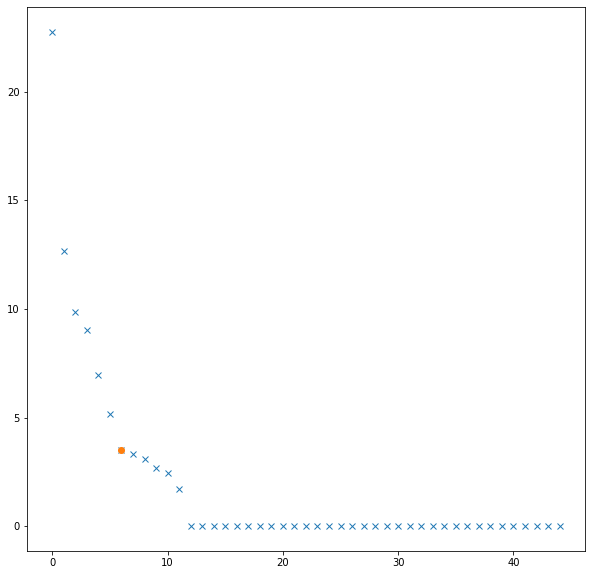

In [93]:
plt.figure(figsize=(10,10))
M = 45 #representa o número de valores próprios
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(6, val_prop[6], 'o')
plt.show()

In [94]:
#podemos reparar pelo método do cotovelo que com 3 vetores próprios temos uma boa representação do conjunto de imagens
#observemos em baixo os primeiros vetores próprios(aqueles que representam melhor o dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


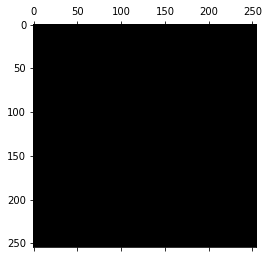

In [100]:
display(plt.matshow(np.reshape(v[0], (255,255,3)), cmap='gray'))

In [87]:
vet_prop[0].shape

(45,)